In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

import numpy as np
import bs4 
import glob

In [4]:
img_raw=tf.io.read_file('./dataset/images/Abyssinian_1.jpg')
img_tensor=tf.image.decode_jpeg(img_raw)
img_tensor.shape

TensorShape([400, 600, 3])

In [61]:
img_tensor

<tf.Tensor: shape=(400, 600, 3), dtype=uint8, numpy=
array([[[27, 38, 24],
        [27, 38, 24],
        [27, 38, 24],
        ...,
        [40, 51, 35],
        [39, 50, 34],
        [37, 48, 32]],

       [[27, 38, 24],
        [27, 38, 24],
        [27, 38, 24],
        ...,
        [41, 52, 36],
        [39, 50, 34],
        [38, 49, 33]],

       [[26, 37, 23],
        [26, 37, 23],
        [27, 38, 24],
        ...,
        [42, 53, 37],
        [40, 51, 35],
        [39, 50, 34]],

       ...,

       [[11, 18, 10],
        [11, 18, 10],
        [11, 18, 10],
        ...,
        [15, 23, 10],
        [14, 22,  9],
        [14, 22,  9]],

       [[12, 19, 11],
        [11, 18, 10],
        [10, 17,  9],
        ...,
        [15, 23, 10],
        [15, 23, 10],
        [15, 23, 10]],

       [[12, 19, 11],
        [11, 18, 10],
        [10, 17,  9],
        ...,
        [15, 23, 10],
        [15, 23, 10],
        [15, 23, 10]]], dtype=uint8)>

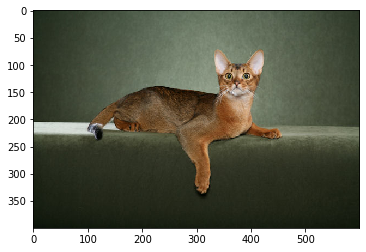

In [5]:
plt.imshow(img_tensor)



In [6]:
xml=open('./dataset/annotations/xmls/Abyssinian_1.xml','r').read()
xml

'<annotation>\n    <folder>OXIIIT</folder>\n    <filename>Abyssinian_1.jpg</filename>\n    <source>\n        <database>OXFORD-IIIT Pet Dataset</database>\n        <annotation>OXIIIT</annotation>\n        <image>flickr</image>\n    </source>\n    <size>\n        <width>600</width>\n        <height>400</height>\n        <depth>3</depth>\n    </size>\n    <segmented>0</segmented>\n    <object>\n        <name>cat</name>\n        <pose>Frontal</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <bndbox>\n            <xmin>333</xmin>\n            <ymin>72</ymin>\n            <xmax>425</xmax>\n            <ymax>158</ymax>\n        </bndbox>\n        <difficult>0</difficult>\n    </object>\n</annotation>\n'

In [7]:
soup=bs4.BeautifulSoup(xml,features='lxml')

In [14]:
#图片的宽度和高度 ，并非矩形框
width =int(soup.width.text) 
height =int(soup.height.text)

xmin =int(soup.xmin.text)
xmax =int(soup.xmax.text)

ymin =int(soup.ymin.text)
ymax =int(soup.ymax.text)

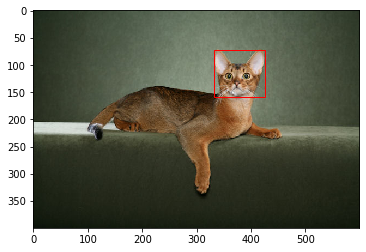

In [9]:
plt.imshow(img_tensor)
ax=plt.gca()#获得当前子图 
rect=plt.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,fill=False,color='red')
ax.add_patch(rect)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


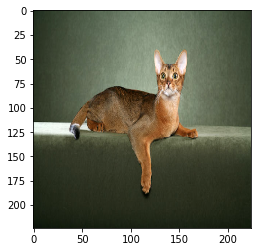

In [15]:
#resize之后进行绘制，x y也对应变换
img=tf.image.resize(img_tensor,[224,224])
img=img/224
plt.imshow(img)
xmin_=(xmin/width)*224
xmax_=(xmax/width)*224
ymin_=(ymin/height)*224
ymax_=(ymax/height)*224

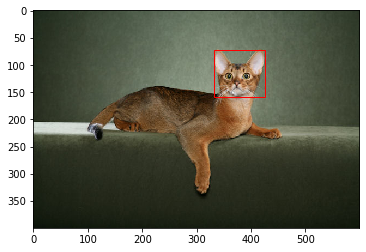

In [16]:
plt.imshow(img_tensor)
ax=plt.gca()#获得当前子图 
rect=plt.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,fill=False,color='red')
ax.add_patch(rect)